In [3]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [4]:
root = '../data'
paths = os.listdir(root)

paths_ecg = []
paths_ppg = []
paths_ecg_ppg = []
paths_fusion = []

paths_ecg_split = []
paths_ppg_split = []
paths_ecg_ppg_split = []
paths_fusion_slipt = []

for path in paths:
    path_completed = os.path.join(root, path)
    if 'ECG_PPG_FedAvgBio' in path:
        paths_ecg_ppg_split.append(path_completed)
    elif 'ECG_FedAvgBio' in path:
        paths_ecg_split.append(path_completed)
    elif 'PPG_FedAvgBio' in path:
        paths_ppg_split.append(path_completed)
    elif 'Fusion_FedAvgBio' in path:
        paths_fusion_slipt.append(path_completed)
    elif 'ECG_PPG' in path:
        paths_ecg_ppg.append(path_completed)
    elif 'ECG' in path:
        paths_ecg.append(path_completed)
    elif 'PPG' in path:
        paths_ppg.append(path_completed)
    elif 'Fusion' in path:
        paths_fusion.append(path_completed)

In [5]:
# Função para calcular a média de 'rs_test_acc' para uma lista de caminhos
def calculate_mean_accuracy(paths):
    acc = []
    loss = []
    for path in paths:
        with h5py.File(path, 'r') as file:
            acc.append(file['rs_test_acc'][:])
            loss.append(file['rs_train_loss'][:])
    mean_acc = np.mean(np.array(acc), axis=0)
    mean_loss = np.mean(np.array(loss), axis=0)
    return mean_acc, mean_loss

# Calculando as médias para cada conjunto de dados
acc_ecg, loss_ecg = calculate_mean_accuracy(paths_ecg)
acc_ppg, loss_ppg = calculate_mean_accuracy(paths_ppg)
acc_ecg_ppg, loss_ecg_ppg = calculate_mean_accuracy(paths_ecg_ppg)
acc_fusion, loss_fusion = calculate_mean_accuracy(paths_fusion)

# Calculando as médias para cada conjunto de dados
acc_ecg_slipt, loss_ecg_slipt = calculate_mean_accuracy(paths_ecg_split)
acc_ppg_slipt, loss_ppg_slipt = calculate_mean_accuracy(paths_ppg_split)
acc_ecg_ppg_slipt, loss_ecg_ppg_slipt = calculate_mean_accuracy(paths_ecg_ppg_split)
acc_fusion_slipt, loss_fusion_slipt = calculate_mean_accuracy(paths_fusion_slipt)


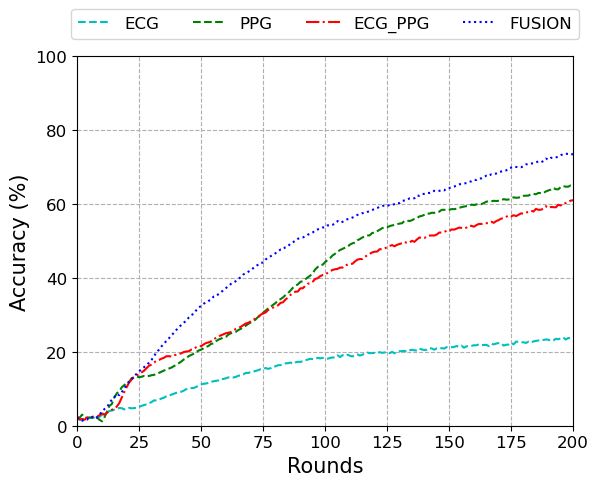

In [6]:
indexes = np.arange(0, len(acc_ecg))

# Plotando cada linha com estilos diferentes
plt.plot(indexes, acc_ecg*100, label="ECG", linestyle='--', color='c')  
plt.plot(indexes, acc_ppg*100, label="PPG", linestyle='--', color='g') 
plt.plot(indexes, acc_ecg_ppg*100, label="ECG_PPG", linestyle='-.', color='r')  
plt.plot(indexes, acc_fusion*100, label="FUSION", linestyle=':', color='b')  

# Ajustes no gráfico
plt.xlabel("Rounds", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlim(0, 200)
plt.ylim(0, 100)

# Colocando a legenda acima do gráfico
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, fontsize=12)

# Adicionando a grade
plt.grid(linestyle='--')

# Exibindo o gráfico
plt.savefig('acc.pdf', bbox_inches='tight')
plt.show()

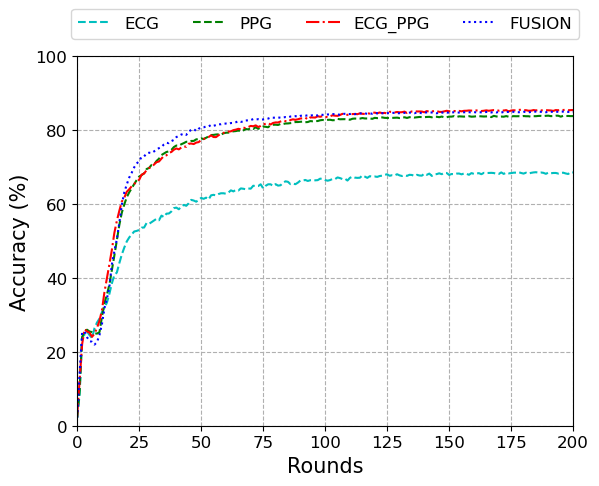

In [7]:
indexes = np.arange(0, len(acc_ecg))

# Plotando cada linha com estilos diferentes
plt.plot(indexes, acc_ecg_slipt*100, label="ECG", linestyle='--', color='c')  
plt.plot(indexes, acc_ppg_slipt*100, label="PPG", linestyle='--', color='g') 
plt.plot(indexes, acc_ecg_ppg_slipt*100, label="ECG_PPG", linestyle='-.', color='r')  
plt.plot(indexes, acc_fusion_slipt*100, label="FUSION", linestyle=':', color='b')  

# Ajustes no gráfico
plt.xlabel("Rounds", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlim(0, 200)
plt.ylim(0, 100)

# Colocando a legenda acima do gráfico
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, fontsize=12)

# Adicionando a grade
plt.grid(linestyle='--')

# Exibindo o gráfico
plt.savefig('acc_split.pdf', bbox_inches='tight')
plt.show()

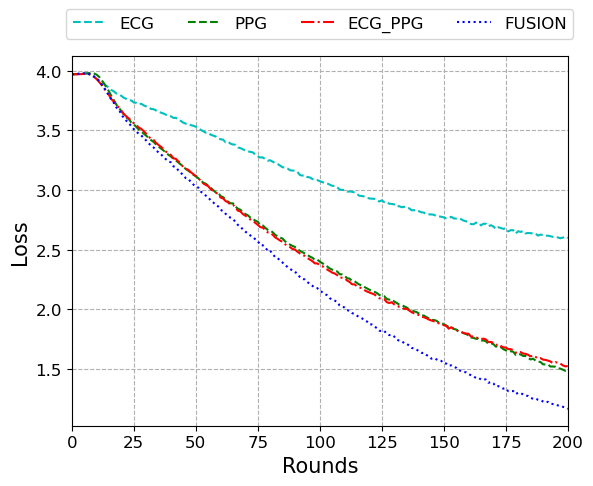

In [8]:
indexes = np.arange(0, len(acc_ecg))

# Plotando cada linha com estilos diferentes
plt.plot(indexes, loss_ecg, label="ECG", linestyle='--', color='c')  
plt.plot(indexes, loss_ppg, label="PPG", linestyle='--', color='g') 
plt.plot(indexes, loss_ecg_ppg, label="ECG_PPG", linestyle='-.', color='r')  
plt.plot(indexes, loss_fusion, label="FUSION", linestyle=':', color='b')  

# Ajustes no gráfico
plt.xlabel("Rounds", fontsize=15)
plt.ylabel("Loss", fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlim(0, 200)


# Colocando a legenda acima do gráfico
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, fontsize=12)

# Adicionando a grade
plt.grid(linestyle='--')

# Exibindo o gráfico
plt.savefig('loss.pdf', bbox_inches='tight')
plt.show()

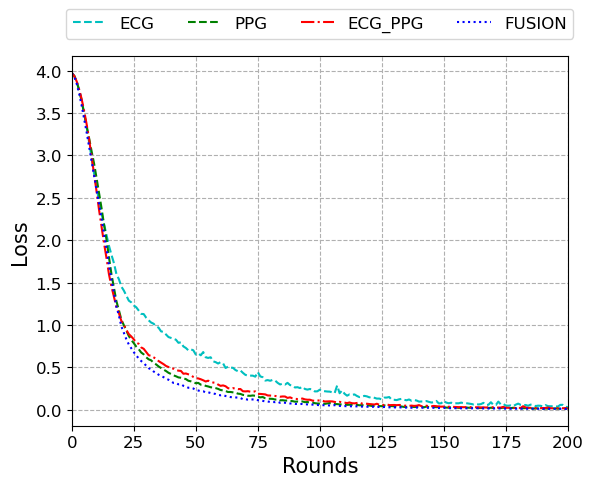

In [9]:
indexes = np.arange(0, len(acc_ecg))

# Plotando cada linha com estilos diferentes
plt.plot(indexes, loss_ecg_slipt, label="ECG", linestyle='--', color='c')  
plt.plot(indexes, loss_ppg_slipt, label="PPG", linestyle='--', color='g') 
plt.plot(indexes, loss_ecg_ppg_slipt, label="ECG_PPG", linestyle='-.', color='r')  
plt.plot(indexes, loss_fusion_slipt, label="FUSION", linestyle=':', color='b')  

# Ajustes no gráfico
plt.xlabel("Rounds", fontsize=15)
plt.ylabel("Loss", fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlim(0, 200)


# Colocando a legenda acima do gráfico
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, fontsize=12)

# Adicionando a grade
plt.grid(linestyle='--')

# Exibindo o gráfico
plt.savefig('loss_split.pdf', bbox_inches='tight')
plt.show()

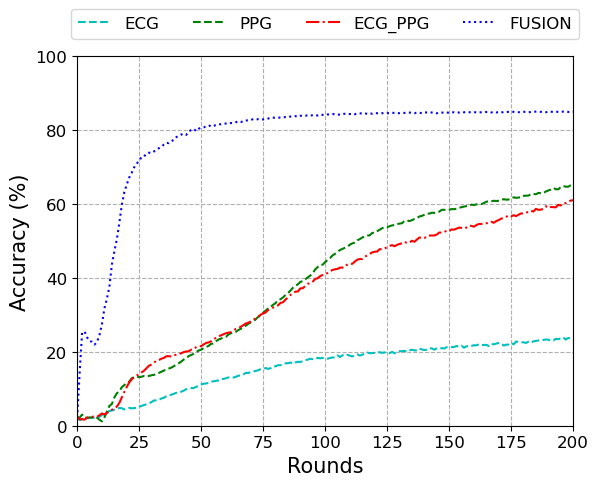

In [10]:
indexes = np.arange(0, len(acc_ecg))

# Plotando cada linha com estilos diferentes
plt.plot(indexes, acc_ecg*100, label="ECG", linestyle='--', color='c')  
plt.plot(indexes, acc_ppg*100, label="PPG", linestyle='--', color='g') 
plt.plot(indexes, acc_ecg_ppg*100, label="ECG_PPG", linestyle='-.', color='r')  
plt.plot(indexes, acc_fusion_slipt*100, label="FUSION", linestyle=':', color='b')  

# Ajustes no gráfico
plt.xlabel("Rounds", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlim(0, 200)
plt.ylim(0, 100)

# Colocando a legenda acima do gráfico
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, fontsize=12)

# Adicionando a grade
plt.grid(linestyle='--')

# Exibindo o gráfico
plt.savefig('acc_fusion_split.pdf', bbox_inches='tight')
plt.show()

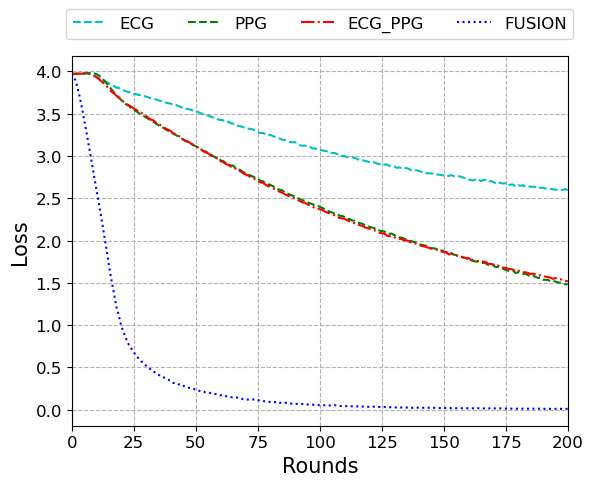

In [11]:
indexes = np.arange(0, len(acc_ecg))

# Plotando cada linha com estilos diferentes
plt.plot(indexes, loss_ecg, label="ECG", linestyle='--', color='c')  
plt.plot(indexes, loss_ppg, label="PPG", linestyle='--', color='g') 
plt.plot(indexes, loss_ecg_ppg, label="ECG_PPG", linestyle='-.', color='r')  
plt.plot(indexes, loss_fusion_slipt, label="FUSION", linestyle=':', color='b')  

# Ajustes no gráfico
plt.xlabel("Rounds", fontsize=15)
plt.ylabel("Loss", fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlim(0, 200)

# Colocando a legenda acima do gráfico
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, fontsize=12)

# Adicionando a grade
plt.grid(linestyle='--')

# Exibindo o gráfico
plt.savefig('loss_fusion_split.pdf', bbox_inches='tight')
plt.show()